# 선형회귀


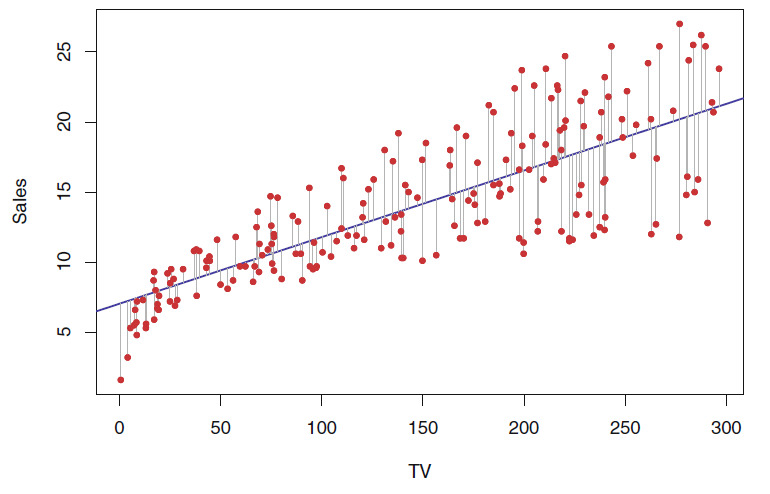

- 선형회귀는 하나 이상의 특성과 연속적인 타깃 변수 사이의 관계를 모델링 하는 것
- 연속적인 출력 값을 예측하는 것
- 특성이 하나인 선형 모델 공식
- Y = W0 + W1*X
- where W0 : y축 절편, W1 : 특성의 가중치
* 목적 : 특성과 타깃 사이의 관계를 나타내는 선형 방정식의 가중치(W)를 학습하는 것

 



* 선형 회귀 모델의 훈련과 비용함수
모델의 훈련이란
* ✔ 모델이 훈련 데이터에 잘 맞도록 모델 파라미터를 설정하는 것
* ✔ 모델이 훈련 데이터에 얼마나 잘 들어맞는지 측정해야 함

모델 훈련에 필요한 비용함수 종류

* MSE (Mean Squared Error)
1. 회귀 모델의 주요 손실 함수
2. 참값과 예측값의 차이인 오차들의 제곱 평균으로 정의
3. 제곱을 해주기 때문에 이상치(outlier)에 민감
* MAE (Mean Absolute Error)
1. 참값과 예측값의 차이인 오차들의 절대값 평균
2. MSE보다 이상치에 덜 민감
* RMSE (Root Mean Squared Error)
1. MSE에 root을 취해 준 것
2. 참값과 비슷한 값으로 변환하기 때문에 해석이 쉬워짐

## 👍 보통 quadratic(2차 곡선형태) 형태의 미분 편의성이 좋기 때문에, 회귀 모형의 비용함수로 MSE를 많이 사용한다

# 선형 회귀 모델의 최적화 방법
1.정규방정식
* 비용 함수를 최소화하는 θ (weight)값을 찾기 위한 해석적 방법
* 정규방정식은 n개의 특성수에 따라서 (n+1) x (n+1)의 X XT 역행렬을 계산한다.


* 이 말은 특성의 수가 많아지면 정규방정식의 구현속도가 느려진다.
* 하지만 다행히도 모델의 복잡도가 훈련 세트의 샘플 수와 특성 수에 선형적으로 증가한다.
* 메모리 공간이 충분하다면 큰 훈련 세트도 효율적으로 처리 가능
* 비용함수(MSE)를 w에 대해 미분을 하면 아래와 같은 식이 나오게 된다.
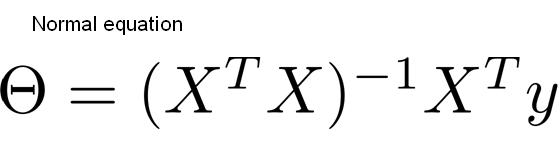

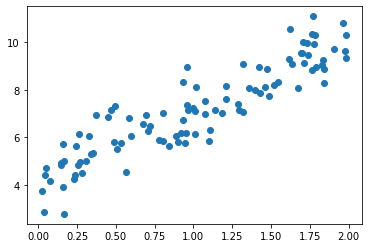

In [1]:
import matplotlib.pyplot as plt
import numpy as np
x = 2 * np.random.rand(100,1) # [0, 1] 범위에서 균일한 분포를 가상으로 하고 shape는 100 X 1 array 로 구성 
y = 4 + 3*x + np.random.randn(100,1) # normal distribution(mu=0,var=1)분포 100 X 1 array 더한것은 노이즈를 준것임
plt.scatter(x,y)
plt.show()

In [ ]:
x_b = np.c_[np.ones((100,1)),x] # 모든 샘플에 index 0번에 1을 추가 
#x bias 텀에 1을 추가 하는 이유는 기울기와 절편인 w0(바이어스)와 w1을 모두 학습해야하는데
#w0을 넣지않으면 기울기만 학습하는 결과가 됨 따라서 가상으로 1을 붙여줘서 학습이 되도록 해줌
# x_bias를 줄임
x_b

In [7]:
# np.linalg.inv는 넘파이 선형대수 모듈(linalg)의 inv(역함수)
# .dot은 행렬 곱셈
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y) 
# 비용함수(MSE)를 w에 대해 미분을 하면 아래와 같은 식  식을 구현한것임
theta_best
#4.22는 절편 2.9기울기

array([[4.22131975],
       [2.90108867]])

* 기존의 목적함수가 y = 4 + 3*x + np.random.randn(100,1)라서, 예측한 θ0 : 4, θ1 : 3을 기대했지만, 비슷하긴해도 노이즈 때문에 원래의 파라미터를 맞출 수 없었다

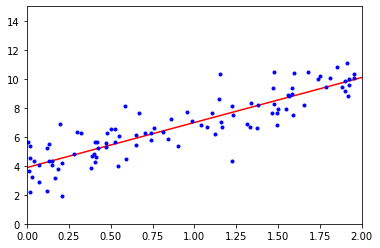

In [ ]:
# theta_best를 사용해서 y 값 예측
x_new = np.array([[0],[2]])
x_new_b = np.c_[np.ones((2,1)),x_new]
prediction = x_new_b.dot(theta_best)
prediction
 
plt.plot(x_new,prediction,"r-")
plt.plot(x,y,"b.")
plt.axis([0,2,0,15]) # x축 범위 0~2, y축 범위 0~15 
plt.show()

* 위와 같은 작업을 아래와 같이 sklearn(사이킷런) 라이브러리를 사용하여 구현할 수 있다.

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)
print(lin_reg.intercept_,lin_reg.coef_)
#4.2 와 2.9가 유사하게 나옴 절편과 기울기 임

[4.22131975] [[2.90108867]]


In [ ]:
print(lin_reg.predict(x_new))

[[ 3.88253646]
 [10.09189637]]


이상은 정규방정식을 활용하여 regression을 하였여 최적의 w0와 w1을 찾았지만  최근에는 경사하강법을 많이 활용함

# 2.경사 하강법

 * 여러 종류의 문제에서 최적의 방법을 찾을 수 있는 매우 일반적인 최적화 알고리즘

 * 기본 메커니즘은 지정한 비용 함수(Loss Function : 예 MSE)를 최소화하기 위해 파라미터를 반복적으로 수정하는 것 
 무작위로 벡터 θ를 초기화한다.

파라미터 벡터 θ에 대해 비용 함수(Loss Function)의 현재 그래디언트를 계산한다.

그리고 그래디언트가 감소하는 방향으로 진행하면서, 최종적으로 계산된 그래디언트가 0이 되면 최솟값에 도달하도록 해야 한다

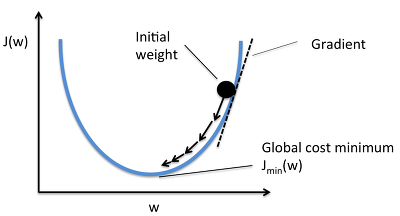


* 위 그림처럼 경사 하강법에서 최적화 시키는 방향으로 가게 하는 중요한 하이퍼파라미터 step(learning rate)를 결정해야 한다.

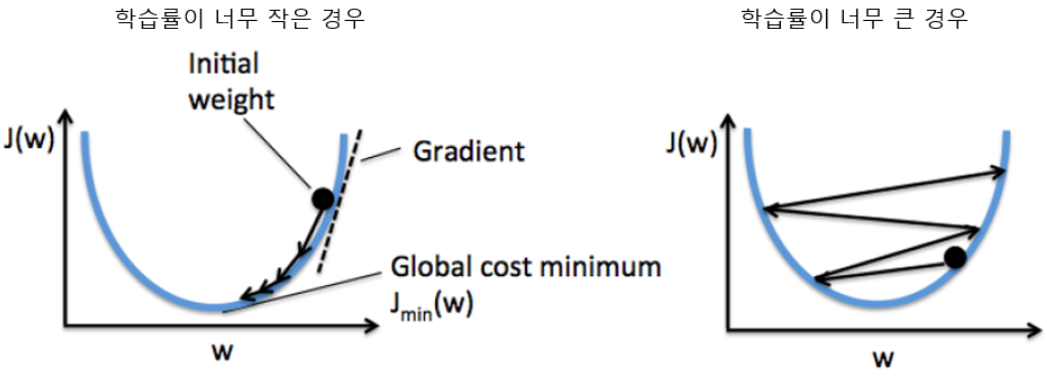

 * 실제 모든 비용함수는 위와 같이 quadratic(이차원)하게 표현되지 않고 울긋불긋하게 솟았다가 내려앉았다가 한다.

* 학습률이 너무 작은 경우에는 local minumum(지역 최소값)에 빠지게 된다.

* 학습률이 너무 큰 경우에는 수렴이 되지 않게 된다.

* 그래서 위 그림처럼 학습률을 잘 조정해야지, global minumum(최적의 값)으로 잘 수렴할 수 있다.

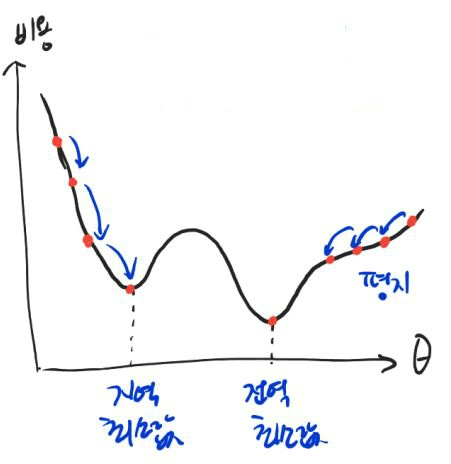

* 다행히도 선형 회귀의 MSE 비용 함수는 convex function(볼록 함수)이기 때문에, local minum이 없고, global minimum만 존재한다.

* 그래서 충분한 시간과 적절한 학습률만 주어진다면, global minimum에 최대한 근접할 수 있다.

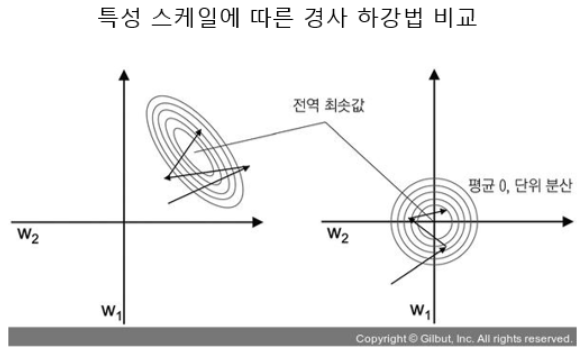

* 위 그림은 데이터를 스케일링 하지 않고 진행한것과 스케일링후 진행한 것의 차이 
* 위 그림처럼 오른쪽의 경사 하강법은 곧장 global minimum으로 내려갈 수 있다.

* 왼쪽의 그림에서 완만한 경사를 만나게 되면 global minimum으로 내려갈 수는 있지만 더 오래 걸린다.

* 경사 하강법 전에는 반드시 모든 특성을 같은 스케일을 사용하여서 데이터 변환을 하여야 한다.

* scikit learn(사이킷런) 라이브러리에서 각 특성에서 평균을 빼고 표준편차로 나누어 평균을 0 분산을 1로만드는 StandardScaler을 사용하곤 한다.

# 경사하강법의 기법 3가지
1. 배치경사 하강법
2. 확률적 경사 하강법
3. 미니 배치 경사 하강법

## 배치 경사 하강법

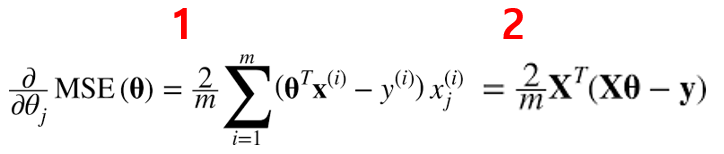

* 경사 하강법에서 각 모델의 θj에 대한 비용 함수의 partial derivative(편미분) 값을 1번 처럼 계산해야 한다.
* partial derivative를 각각 계산하는 대신 2번처럼 한번에 계산도 가능하다.
* ***위공식은 매 경사 하강 스텝에서 전체 훈련 세트에 대해 계산한다***    
* 그래서 이 공식을 Batch Gradient Descent(배치 경사 하강법)이라고 한다.
* ***전체 데이터를 다 사용하기 때문에 큰 훈련 세트에서는 아주 느리다***.
*  장점으로는, 특성 수에 민감하지 않기 때문에 정규방정식보다 경사 하강법을 사용하는 것이 훨씬 빠르다.

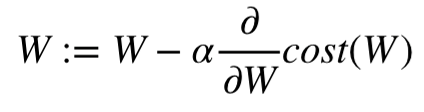

* 위와 같이 그래디언트 벡터가 계산되면 학습률(alpha)에 그래디언트 벡터를 곱하고 이전 weight에 빼면 된다.


* 미분을 하게되면 위의 식에서 알파(학습률learing rate)값을 제외한 뒷부분이 그래디언트가 되는데  그래디언트에 학습률을 곱하여 기존 weigth값에서 빼주고 이를 계속 업데이트함

In [29]:
# 경사 하강법 구현(implementation)
import numpy as np

x = 2 * np.random.rand(100,1) # 100 x 1 크기의 0~1의 균일분포 
x_b = np.c_[np.ones((100,1)),x] # bias(1)를 전체 데이터에 추가 
y = 4 + 3*np.random.randn(100,1) # 100 x 1 크기의 표준정규분포 추출

learning_rate = 0.001 # 하이퍼파라미터인 런닝레이트임 처음에는 작게 주고 시작
iterations = 1000  #1000번 반복하겠다
m = x_b.shape[0] # 100개 (x 데이터)

theta = np.random.randn(2,1) # 2x1 크기의 평균 0, 분산1 정규 분포 추출

for iteration in range(iterations):  #그래디언트를 구하고 그값을 계속 업데이트함
  gradients = 2/m * x_b.T.dot(x_b.dot(theta)-y)
  theta = theta - (learning_rate * gradients)


# 최적의 기울기및 절편 확인.
theta
 

array([[1.68290413],
       [2.48750599]])

##  확률적 경사 하강법

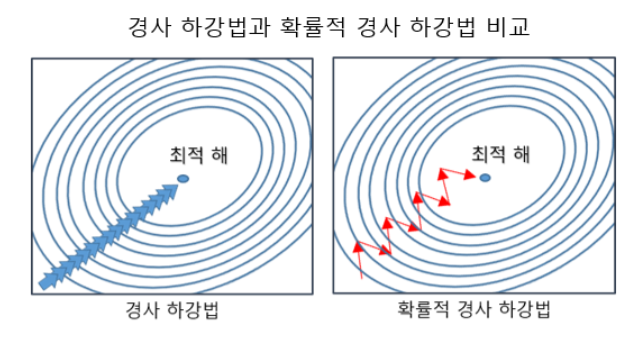

* 앞서, 배치 경사 하강법에서 언급한대로 매 스텝에서 전체 훈련 세트를 사용해서 그래디언트를 계산해야 하는 큰 문제가 있다.
* 이러한 문제를 극복하기 위해, 확률적 경사 하강법은 매 스텝마다 한 개의 샘플을 무작위로 선택 및 그 샘플에 대한 그래디언트를 계산한다.
* 매 반복에서 적은 양의 데이터로 그래디언트를 계산하고 업데이트 하기 때문에 최적화가 더 빠르다.
* 그리고 전체 데이터에서 샘플을 추출해서 최적화 시키기 때문에 매우 큰 훈련 데이터 역시 처리할 수 있다.
* 하지만 무작위 추출이기 때문에, 전체 데이터를 사용하는 것 보다 안정적이지는 못하다.
* 위 그림과 같이 비용 함수의 global minumum에 도달하기 까지 요동치며 평균적으로 감소한다.
* 요동치면서 최적의 해에 가까워지기는 하겠지만, 최소값에 도달하지 않을 수도 있다.
* 하지만 비용 함수가 MSE처럼 convex(볼록 함수)하지 않고 불균형하다면 배치 경사 하강법보다 global minimum에 도달할 가능성이 높다.
* 무작위성으로 인한 global minimum에 도달하지 않을 수 있다는 단점을 극복하기 위해서, 학습률을 점진적으로 감소시키는 해결책이 있다.(시작: 학습률 크게 => 진행단계: 학슬률 작게)
* 위 해결책을 위한 매 반복 학습률 결정 함수를 learning schedule(학습 스케쥴)이라고 부른다.

In [ ]:
# 확률적 경사 하강법 구현(implementation)
epochs = 1000
t0,t1 = 5,50 # 학습 스케쥴 (하이퍼 파라미터)
m = x_b.shape[0] # 100개 (x 데이터)

def learning_schedule(t):
  return t0 / (t+t1)

theta = np.random.randn(2,1) # 2x1 크기의 평균 0, 분산1 정규 분포 추출

for epoch in range(epochs):
  for i in range(m): #m은 데이터 수 만큼
    random_index = np.random.randint(m) # 0 ~ m-1까지 랜덤 숫자 1
    xi = x_b[random_index:random_index:+1] # 1 x 2 크기
    yi = y[random_index:random_index+1] # 1 x 1 크기
    gradients = 2 * xi.T.dot(xi.dot(theta)-yi) # 1 => mini_m
    learning_rate = learning_schedule(epoch*m + i)
    theta = theta - learning_rate * gradients

## 미니배치 경사 하강법

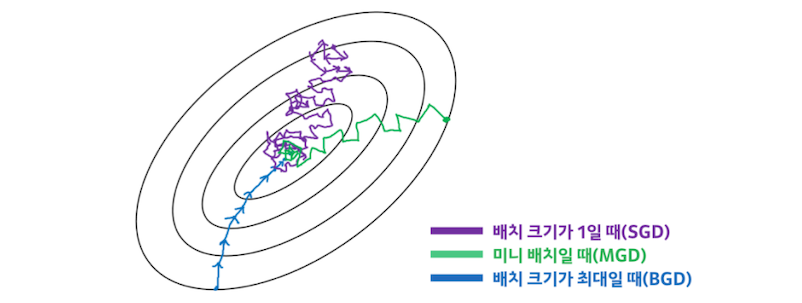
* 미니배치는 위 배치와 확률적 경사 하강법을 안다면 이해하기 쉽습니다.* 각 Step에서 전체 훈련 세트를 일일이 다 학습하는 배치 경사 하강법이나 훈련 세트의 하나의 샘플을 통해서 학습하는 * 확률적 경사 하강법과 같이 그래디언트를 계산하는게 아니라, Mini Batch라 부르는 임의의 작은 샘플 세트에 대해 그래디언트를 계산하는 것이다.
확률적 경사 하강법에 비해 행렬 연산에 최적화된 GPU를 사용해서 성능을 더 올릴 수 있다.
* 미니 배치가 큰 경우, 파라미터 공간에서 SGD(확률적 경사 하강법)보다 덜 불규칙하게 움직인다.
* 곧, SGD보다 최소값에 도달할 수 있는 가능성이 더 높지만, Local Minimum(국소값)에 빠질 위험은 존재한다.

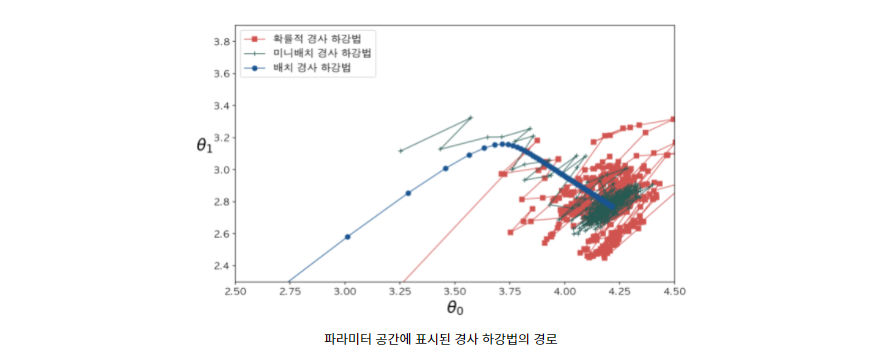


* 위 그림은 국소값이 많고 문제가 되는 파라미터 공간에서 배치, 미니배치, 확률적 경사 하강법을 비교한 그림이다.
* 모두 최소값에 도달하였지만, 배치 경사 하강법이 실제 최소값에서 도달하였고, 나머지 두 방법은 근처를 맴돌고 있다.
* 배치 경사 하강법이 최소값에 도달할 수는 있지만, 매 스텝에서 많은 시간과 비용이 든다.
* 확률적 경사 하강법과 미니 배치는 적절히 학습 스케쥴을 사용한다면 최소값에 마찬가지로 도달 할 수 있다.

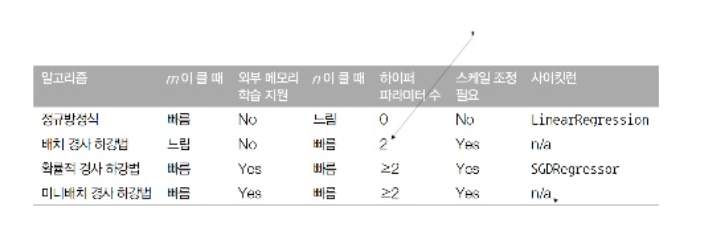

m은 데이터 전체의 크기
n은 특성의 갯수

사이킷런의 SGDRegressor와 SGDClassifier에서 partial_fit 메서드를 사용하여 모델 파라미터를 초기화하지 않고 미니배치 학습을 위해 반복적으로 호출할 수 있다. 하지만 partial_fit 메서드는 fit 메서드와 동일하게 미니배치의 샘플을 하나씩 적용하므로 엄밀히 말하면 미니배치 경사 하강법 알고리즘은 아니다. - 핸즈온 머신러닝 책-

# 다항회귀

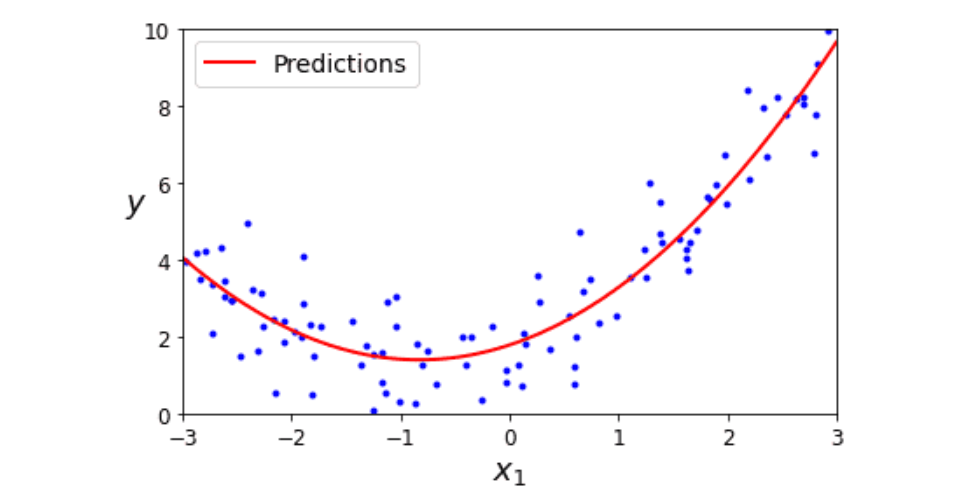

* 비선형성을 띄는 데이터도 선형 모델을 활용하여서 학습시킬 수 있다.
* 기존 특성에다가 log, exp, 제곱 등과 같은 basis function을 적용하여, 확장된 특성을 포함한 형태로 변형한 뒤 학습시키는 것을 다항 회귀 기법이라고 한다.
* 위와 같은 예시를 2차 방정식으로 간단하게 들어 보겠다.

In [2]:
import numpy as np
data_num = 1000 #데이터 1000개 수
x = 3 * np.random.rand(data_num,1) - 1 # 균일분포를 100by 1로 뽑음
y = 0.2 * (x**2) + np.random.randn(1000,1) #제곱으로 가상의 식을 만들어줌

# 1차 방정식 : y = ax
# n차 방벙식 : y = ax + ax^2 + ax^3 +....ax^n  이렇게 되는 데 폴리노미날 피처라고 함

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2,include_bias=False) #degree는 2차 방정식 w0 바이어스는 False
x_poly = poly_features.fit_transform(x) 
print(x[0])
print(x_poly[0])

# [0.06528421] 1 차일때 
# [0.06528421 0.00426203] 2차일때 기울기 2개 나옴

[0.15340985]
[0.15340985 0.02353458]


In [3]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_poly,y)
print(lin_reg.intercept_,lin_reg.coef_)
# [-0.052073] 그냥 선형일 때
#  [[-0.02739132  0.23553308]] =  y_hat = 0.23x^2 - 0.02x^1 + 1 
#  y = 0.2 * (x**2) + np.random.randn(1000,1) 
# 실제 기울기를 0.2로 두었는데 거의 유사하게 맞춤

[0.06701078] [[-0.00127535  0.1389299 ]]


* 예측 모델의 식은 y_hat = 0.23x^2 - 0.02x^1 + 1 이다. 실제 원래 함수와 거의 비슷해졌다.

* 특성이 여러 개 일 때 다항 회귀는 이 특성 사이의 관계를 찾을 수 있습니다.(PolynomialFeatures를 통해서 주어진 차수까지 특성 간의 모든 교차항을 추가할 수 있기 때문)

* 훈련 세트와 검증 세트의 모델 성능을 살펴 보는 것, (모델 과적합을 가시적으로 확인 하는 법)

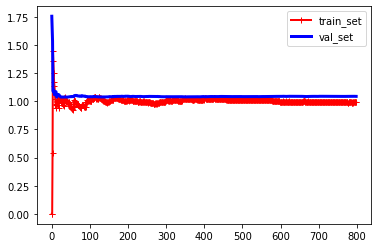

In [4]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def plot_learning_curves(model,x,y):
    x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.2)
    train_errors,val_errors = [],[]
    for num in range(1,len(x_train)):
        model.fit(x_train[:num],y_train[:num])
        y_train_predict = model.predict(x_train[:num])
        y_val_predict = model.predict(x_val)
        train_errors.append(mean_squared_error(y_train[:num],y_train_predict))
        val_errors.append(mean_squared_error(y_val,y_val_predict))
    plt.plot(np.sqrt(train_errors),'r-+',linewidth=2,label='train_set')
    plt.plot(np.sqrt(val_errors),'b-',linewidth=3,label='val_set')   
    plt.legend()
    plt.show()

plot_learning_curves(lin_reg, x, y)
#트레인 셋에 대한 에러가 처음에는 작다가 점점커지다가 어느정도 선에서 수렴하게됨
#validataion 셋도 처음에 에러가 크다가 에러가 점점 맞춰짐 
# 에폭수가 증가함에 따라 수렴하게되는데 이이상 돌려봐야 소용없으니 멈추고 중간중간 확인해 줄 수 있음

## basis function(4차 다항식)과 모델을 파이프라인을 거쳐서 바로 모델링 및 평가하는 법

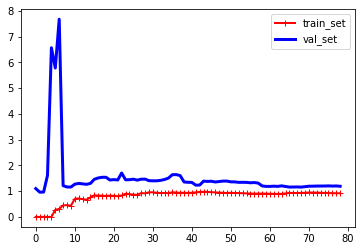

In [5]:
#파이프 라인은 요즘 트렌드 전처리와 모델을 한번에 할수 있게 해줄수 있는 개념
from sklearn.pipeline import Pipeline
data_num = 100
x = 3 * np.random.rand(data_num,1) - 1
y = 0.2 * x**2 + np.random.randn(100,1)
polynomial_regression = Pipeline([
  ("poly_features",PolynomialFeatures(degree=4,include_bias=False)),
  ("lin_reg",LinearRegression())
  ]) #두개를 한꺼번에 묶어서 돌려주는것 좀더 생산성 있는 모델링을 할수 있으니 알아둘것
plot_learning_curves(polynomial_regression,x,y)

# 규제가 있는 선형 모델
* 앞에서도 보았듯이 과대적합을 감소시키는 것이 아주 중요하고, 그 과대적합을 줄일 수 있는 방법을 강구해야 한다.
* 그 방법 중 loss에 새로운 term을 추가하여서 모델 weight에 대한 규제를 가하는 것이다.
Lasso Regression (라쏘 회귀)

1.  Lasso(라쏘)회귀는 선형 회귀의 규제된 버전이다.
비용 함수에 L1 term(가중치에 절대값을 적용한 형태)을 사용하여서 weight에 규제를 한다  
 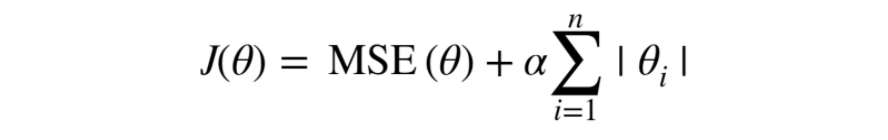

.

In [6]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1) 
#규제를 두는 것 a에 큰 값을 주면 w가 민감해짐 w가 커지는 것을 규제하는 것
#작은값 0.000001을 주게되면 weight에 대해서는 생각안하고 MSE만 쓴다는 소리
#a값에 따라서 라쏘의 성능이 많이 달라짐
#무조건 base모델에서 과적합이 일어날 경우 규제를 사용할 경우도 있음
# a 값을 작은 값부터 조금씩 높여야 할 필요가 있음
#하이퍼 파리마터를 우선순위로 조정할지도 알아봐야 함
lasso_reg.fit(x,y)
lasso_reg.predict([[1.5]])
 #lasso는 절대값이 들어가는데 너무 작은 weight값은 0으로 만들어 버림
 #weight 값이 작은 특성들은 0이되기때문에 차원축소 효과가 있음

array([0.32518159])



2.  Ridge Regression (릿지 회귀)  


* Ridge(릿지)회귀는 선형 회귀의 규제된 버전이다.
* 비용 함수에 L2 term(가중치에 제곱을 한 형태)을 사용하여 weight에 규제를 한다.
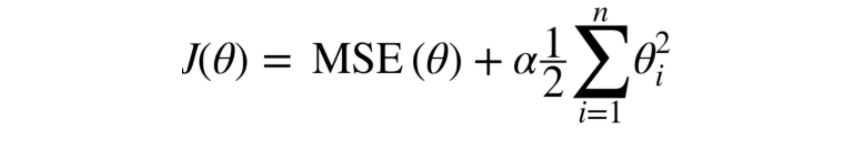

In [7]:
# 안드레 루이 숄레스키가 발견한 행렬 분해(matrix factorization) 사용
# 숄레스키 분해의 장점은 성능이다. 원래 ridge의 solver default값은 'auto'이며 희소 행렬이나 특이 행렬이 아니면 'cholesky'가 된다.
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.1,solver='cholesky') #
ridge_reg.fit(x,y)
ridge_reg.predict([[1.5]])
#ridge는 변수를 모두 다쓰기는 하지만 쓸모없는 변수가 있더라도 변수가 사라지지
#  않지만 0에 가까운 값으로 만들어 영향력을 줄여줌
#보통 릿지를 많이 씀
#변수를 제거하는 것은 문제가 생길수 있음

array([[0.44982018]])

3.   Elastic Net Regression (엘라스틱넷 회귀)
* Elastic Net(엘라스틱넷)은 릿지 회귀와 라쏘 회귀를 합성한 모델이다.
* 규제 term은 릿지회귀의 규제term과 단순히 더해서 사용하고, 혼합 비율 r(gammar값)을 조절해서 사용한다.
** r=0이면, 엘라스틱 넷은 => 릿지 회귀
** r=1이면, 엘라스틱 넷은 => 라쏘 회귀


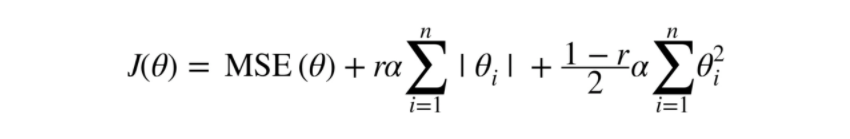

In [8]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_net.fit(x,y)
elastic_net.predict([[1.5]])


array([0.37565446])

이상 과적합을 방지하기 위해 릿지라소 엘라스틱 넷을 보았음

# Early Stopping (조기 종료)
* 경사 하강법과 같은 반복적인 학습 알고리즘을 규제하는 것은 실제 비용함수에 규제항을 추가하는 것 뿐만 아니라, 검증 에러가 훈련 에러에 비해 치솟게 되면 바로 훈련을 중지시키는 방법도 있다. 
* 이를 early stopping이라 한다.

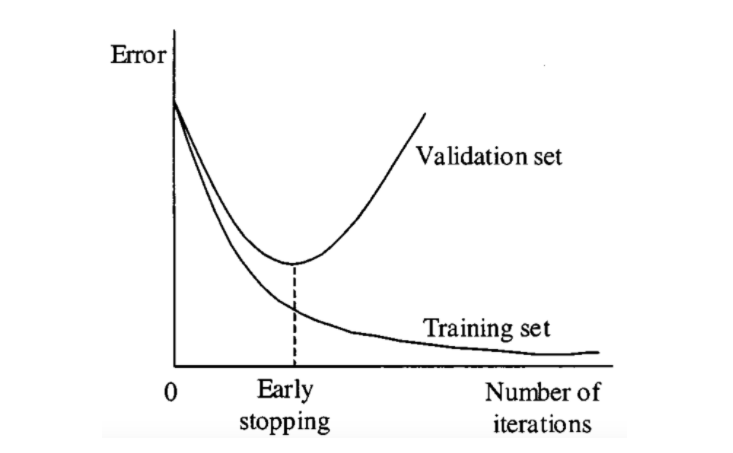

* train data에서 global minimuns에 도달하여 validation 데이터가 가장 좋은 성능을 보이다가 그 이후 train 훈련이 지속되고 train 데이터에서 결과값이 잘 나오나 validation 데이터는 좋지 않게나오는 과적합이 일어나 면 그전에 가장 좋았던 부분에 조기 종료시킴

In [10]:
from sklearn.base import clone #모델을 복제해주는 역할
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.linear_model import SGDRegressor #확률배치 경사하강법  stochastic gradient descent리그레서
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error #MSE 사용 아래가 둥근 2차 함수 이므로..
 
x = 3 * np.random.rand(data_num,1) - 1
y = 0.2 * x**2 + np.random.randn(100,1)

poly_scaler = Pipeline([
                        ("poly_features",PolynomialFeatures(degree=90,include_bias=False)),
                        ('std_scaler',StandardScaler())
])
#90차원의 폴리노미어 
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.2)
x_train_poly_scaled = poly_scaler.fit_transform(x_train) #fit_transform을 시켜줌
x_val_poly_scaled = poly_scaler.transform(x_val) 
#validation 는 훈련셋에서 fit_transform을 시켜준 값을 그대로 사용하기 위하여 transform 을 사용함
#만약에 validation 데이터도  fit_transform하게되면 validation 자체 데이터 값으로 스케일이 되기때문에 문제가 생김 


sgd_reg = SGDRegressor(n_iter_no_change=1,warm_start=True,penalty=None,
                       learning_rate='constant',eta0=0.0005)
# n_iter_no_change : Number of iterations with no improvement to wait before stopping fitting
# 즉, 기본값(디폴트)은 5임 보통 10~20정도 줘야하는데 여기서는 만약 1을 주었는데 이는
# 1번 이라도 값이 튀면 멈추는 ealry stoping 하이퍼 파라미터임

# warm_start=True 이면 fit 메서드가 호출될 때 처음부터 다시 하지 않고 이전 모델 파라미터에서 훈련 이어짐
# penalty : {‘l2’, ‘l1’, ‘elasticnet’}, default=’l2’
#learing_rate = 배치경사 하강법(전체데이터)과 확률경사 하강법의 차이는 데이터를 전체 다 쓰는지 안쓰는지에 차이고
#데이터를 다쓰면 느리지만 global minimun에 다가갈수 있지만 확률경사하강법은 빠르지만 못갈 수있음
#그래서 learning_scaduler를 사용하면 그 해결책이 되지만 여기서는 constant로 두어 그냥 무시하고 진행
#옵션은 아래와 같음 옵션에 맞춰 확룰적 경사하강법을 사용하면 됨
# 'constant' : eta = eta0
# 'optimal' : eta = 1.0 / (alpha * (t + t0))
# 'invscaling' : eta = eta0 / pow(t, power_t)
# 'adaptive' : eta = eta0, as long as the training keeps decreasing

minimum_val_error = float('inf') #최소오차는 무한대에서 시작하도록 초기화
best_epoch = None
best_model = None
for epoch in range(1000):
  sgd_reg.fit(x_train_poly_scaled,y_train.ravel())
  y_val_predict = sgd_reg.predict(x_val_poly_scaled)
  val_error = mean_squared_error(y_val,y_val_predict)
  if val_error<minimum_val_error: #처음에는 무한대 이므로 당연히 val error가 작고 이를 업데이트 해주고 이를 반복
    minimum_val_error = val_error #저장 해주고 계속 업데이트
    best_epoch = epoch              #현재가 베스트 에폭
    best_model = clone(sgd_reg)
print('best_epoch : ',best_epoch)
print('best_model : ',best_model)

best_epoch :  0
best_model :  SGDRegressor(eta0=0.0005, learning_rate='constant', n_iter_no_change=1,
             penalty=None, warm_start=True)


오늘 배운 내용들은 뒤에서도 계속해서 반복되면서, 앞으로 모든 머신러닝의 원리에 적용되는 부분이니 잘 이해해두면 좋을 것이고, 오늘 긴 이 내용을 본 당신은 머신러닝의 첫 발을 내딛은 것이다.